In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout

from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv("iris.csv",header=None)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.set_axis(['sepal_length','sepal_width','petal_length','petal_width','class'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The Given data is of Iris Flower, which has 150 samples of 3 different spicies with 4 of its attributes i.e sepal length, sepal width, petal length, petal width.
The Most the columns is continuous in natures except Class which is object datatype

In [6]:
df['class'].value_counts()   #3 category  of flowers

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

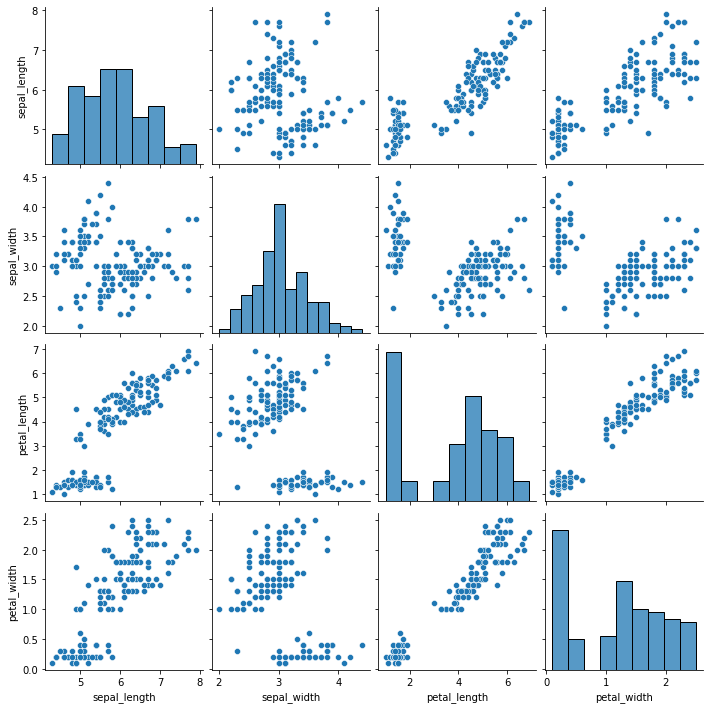

In [7]:
sns.pairplot(data=df)

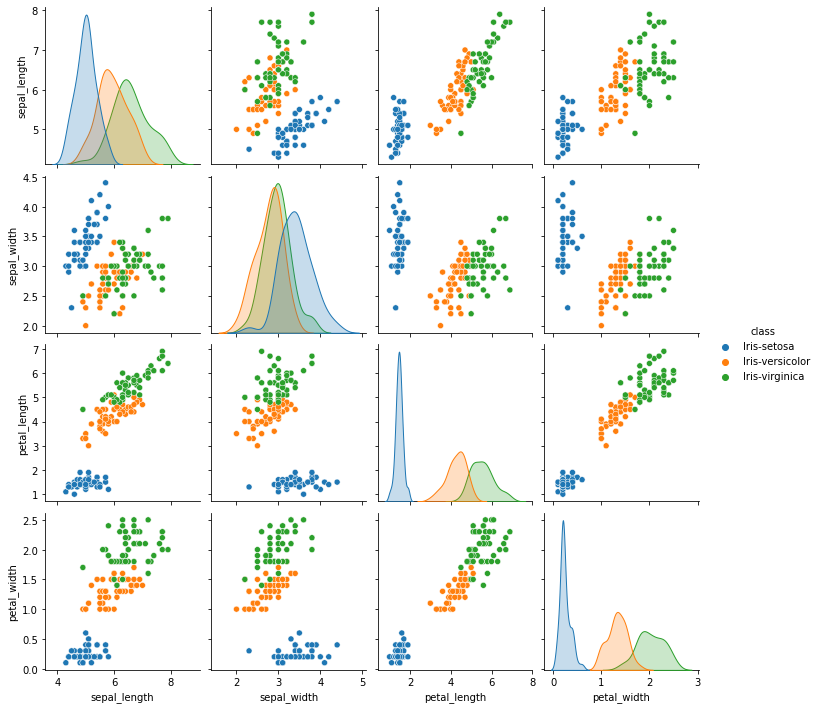

In [8]:
sns.pairplot(data=df, hue="class")

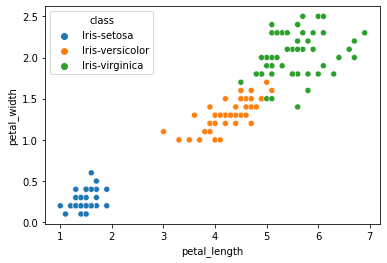

In [9]:
sns.scatterplot( x="petal_length",  y="petal_width",hue="class",data=df)
plt.show()

class setosa has smaller petal lengths and width.
versicolor class lies in the middle  of other two class in term of petal lenth and width.
class virginica has the largest of petal lengths and widths

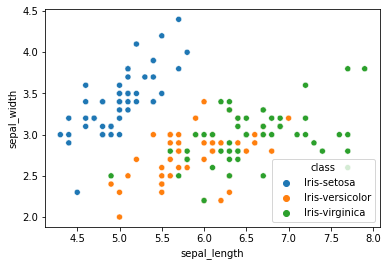

In [10]:
sns.scatterplot( x="sepal_length",  y="sepal_width",hue="class",data=df)
plt.show()

from the above plot we can conclude that-
class setosa has smaller sepal lengths but larger sepal widths.
versicolor class lies in the middle of the other two class in terms of sepal length and width.
class virginica has larger sepal lengths but samller sepal widths 

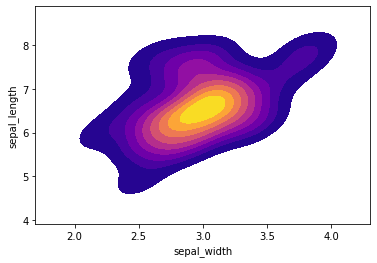

In [11]:
v = df[df['class']=='Iris-virginica']

sns.kdeplot(v['sepal_width'], v['sepal_length'],
                 cmap="plasma", shade=True, shade_lowest=False)

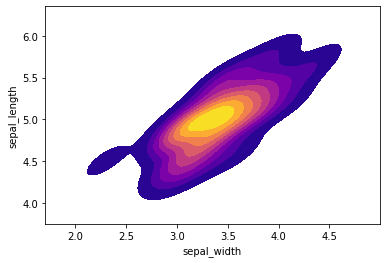

In [12]:
v = df[df['class']=='Iris-setosa']

sns.kdeplot(v['sepal_width'], v['sepal_length'],
                 cmap="plasma", shade=True, shade_lowest=False)

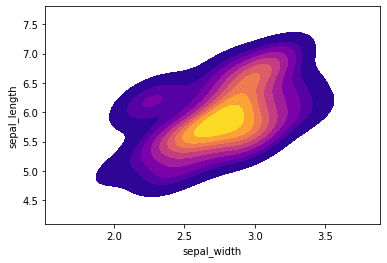

In [13]:
v = df[df['class']=='Iris-versicolor']

sns.kdeplot(v['sepal_width'], v['sepal_length'],
                 cmap="plasma", shade=True, shade_lowest=False)

In [14]:
#separate x and y columns(feautures and target)
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils #for onehotencoding
le=LabelEncoder()
y=le.fit_transform(y)
y = np_utils.to_categorical(y) 

In [18]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [20]:
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [21]:
#split data in test train format
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [53]:
from tensorflow.keras.callbacks import EarlyStopping
ann=Sequential()
ann.add(Dense(units=8,activation="relu"))#ip
ann.add(Dense(units=4,activation="relu"))#hiddenlayer
ann.add(Dense(units=3,activation="softmax"))#op
ann.compile(optimizer="adam",loss="categorical_crossentropy")



In [54]:
earlystop=EarlyStopping(monitor='val_loss',mode='min',verbose=2,patience=25)

In [55]:
ann.fit(xtrain ,ytrain,epochs=250, validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/250
4/4 [==============================] - 1s 57ms/step - loss: 1.0944 - val_loss: 1.0531
Epoch 2/250
4/4 [==============================] - 0s 10ms/step - loss: 1.0763 - val_loss: 1.0425
Epoch 3/250
4/4 [==============================] - 0s 11ms/step - loss: 1.0593 - val_loss: 1.0339
Epoch 4/250
4/4 [==============================] - 0s 16ms/step - loss: 1.0403 - val_loss: 1.0252
Epoch 5/250
4/4 [==============================] - 0s 10ms/step - loss: 1.0275 - val_loss: 1.0177
Epoch 6/250
4/4 [==============================] - 0s 11ms/step - loss: 1.0119 - val_loss: 1.0108
Epoch 7/250
4/4 [==============================] - 0s 10ms/step - loss: 0.9988 - val_loss: 1.0039
Epoch 8/250
4/4 [==============================] - 0s 10ms/step - loss: 0.9856 - val_loss: 0.9971
Epoch 9/250
4/4 [==============================] - 0s 10ms/step - loss: 0.9729 - val_loss: 0.9899
Epoch 10/250
4/4 [==============================] - 0s 10ms/step - loss: 0.9618 - val_loss: 0.9830
Epoch 11/250
4/4 [=

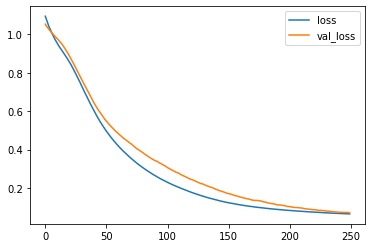

In [56]:
ann.history.history
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()

In [57]:
ypred=ann.predict(xtest)

In [58]:
ypred=ypred>0.5

In [59]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30
 samples avg       0.97      0.97      0.97        30



In [62]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.9666666666666667


In [63]:
#achieved 96% accuracy by model